In [1]:
from skimage.measure import compare_ssim as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
import glob

In [17]:
v2vF = '/Users/Airton/Desktop/vid2vid_1g/vid2vid_1g_gray/test_latest/000/*.jpg'
v2vR = '/Users/Airton/Desktop/vid2vid_1g/vid2vid_1g_gray/test_latest/realradar/*.png'

In [18]:
run1R = []
for filename in sorted(glob.glob(v2vR)):
    im=Image.open(filename).convert('L')
    run1R.append(im)

In [19]:
run1F = []
for filename in sorted(glob.glob(v2vF)):
    im=Image.open(filename).convert('L')
    run1F.append(im)

In [20]:
print(len(run1F))
print(len(run1R))

28
28


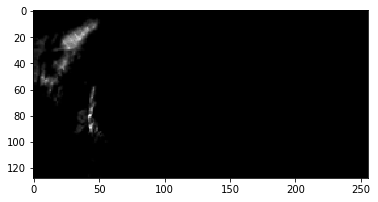

In [21]:
plt.imshow(np.array(run1R[0]),cmap='gray')
plt.show()

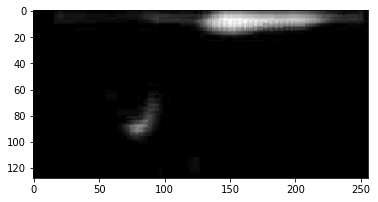

In [22]:
plt.imshow(np.array(run1F[0]),cmap='gray')
plt.show()

In [23]:
MSE = [] 
SSIM =[]

def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

In [24]:
MSE = []
SSIM = []
for i in range(len(run1R)):
    m = mse(np.array(run1R[i]),np.array(run1F[i]))
    s = ssim(np.array(run1R[i]),np.array(run1F[i]))
    MSE.append(m)
    SSIM.append(s)

In [25]:
x=list(range(0,28))

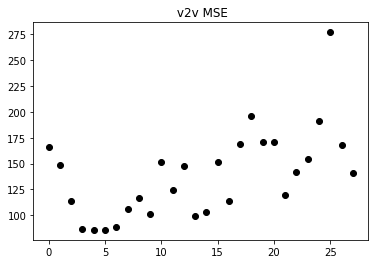

85.86990356445312 276.8477783203125
138.8728474208287


In [26]:
plt.scatter(x,MSE,c='black')
plt.title(" v2v MSE")
plt.show()
print(min(MSE),max(MSE))
print(np.mean(MSE))

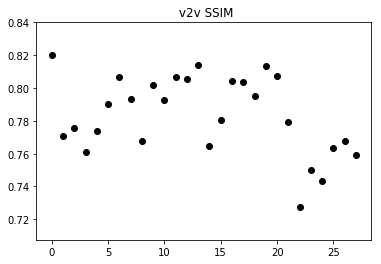

0.72733581059834 0.8201908165726034
0.783609564706585


In [27]:
plt.scatter(x,SSIM,c='black')
plt.title(" v2v SSIM")
plt.show()
print(min(SSIM),max(SSIM))
print(np.mean(SSIM))

In [28]:
from sklearn.metrics import confusion_matrix

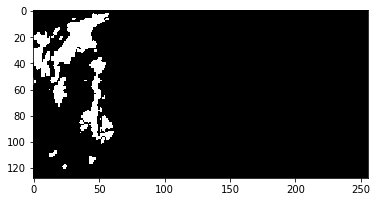

In [29]:
Thr = cv2.threshold(np.array(run1R[1]),1,255,cv2.THRESH_BINARY)
plt.imshow(Thr[1],cmap = 'gray')
plt.show()

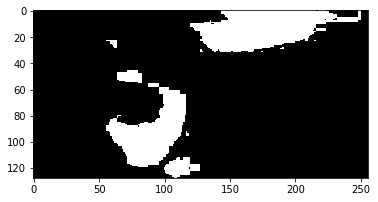

In [30]:
Thf = cv2.threshold(np.array(run1F[1]),1,255,cv2.THRESH_BINARY)
plt.imshow(Thf[1],cmap = 'gray')
plt.show()

In [31]:
Fthr = []
Fthf = []
for i in range(len(run1R)):
    gray_img= np.array(run1R[i])
    gray_img2= np.array(run1F[i])
    th1 = cv2.threshold(gray_img,1,255,cv2.THRESH_BINARY)
    th2 = cv2.threshold(gray_img2,1,255,cv2.THRESH_BINARY)
    Fr = list(th1[1].flatten())
    Ff = list(th2[1].flatten())
    Fthr.append(Fr)
    Fthf.append(Ff)

In [32]:
TN,FP,FN,TP = 0,0,0,0
TN1,FP1,FN1,TP1 = 0,0,0,0

In [33]:
for i in range(len(Fthr)):
    tn,fp,fn,tp=confusion_matrix(Fthr[i], Fthf[i]).ravel()
    TN = TN +tn
    FP = FP +fp
    FN = FN +fn
    TP = TP +tp

In [34]:
Total = TN+FP+FN+TP
TotalP = FN + TP
TotalN = TN + FP
PTN = (TN/Total)*100
PFP = (FP/Total)*100
PFN = (FN/Total)*100
PTP = (TP/Total)*100
To1 = FN + TN
To2 = TP + FP

In [35]:
PTC = []
PTC.append([PTN,PFP,PFN,PTP])

In [36]:
print(len(PTC))
print(PTC)

1
[[77.83769880022321, 13.259233747209823, 8.5845947265625, 0.3184727260044643]]


In [37]:
Correct = PTN + PTP
Wrong = PFN + PFP
print("Correct = ", Correct, " Wrong = ", Wrong)

Correct =  78.15617152622767  Wrong =  21.843828473772323


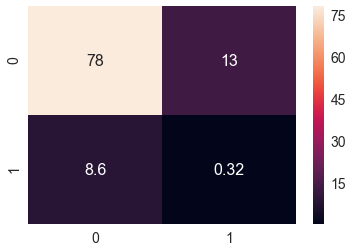

In [38]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[PTN,PFP],
        [PFN,PTP]]        
df_cm = pd.DataFrame(array, range(2),
                  range(2))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

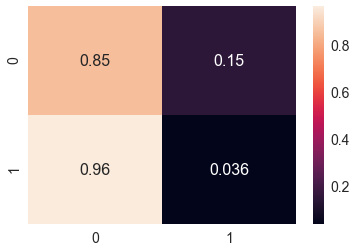

In [39]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[TN/TotalN,FP/TotalN],
        [FN/TotalP,TP/TotalP]]        
df_cm = pd.DataFrame(array, range(2),
                  range(2))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

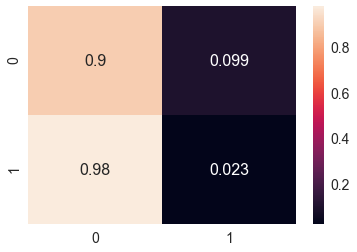

In [40]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[TN/To1,FN/To1],
        [FP/To2,TP/To2]]        
df_cm = pd.DataFrame(array, range(2),
                  range(2))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size